<a href="https://colab.research.google.com/github/nvhien1961999/Covid19_auto_detecting_vision_transformer_model/blob/main/test_ViT_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_folder = "/content/drive/MyDrive/ViT_5" + '/'

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 4.3 MB/s 
     |████████████████████████████████| 895 kB 37.9 MB/s 
     |████████████████████████████████| 596 kB 40.8 MB/s 
     |████████████████████████████████| 3.3 MB 13.4 MB/s 
     |████████████████████████████████| 61 kB 455 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from torch import nn, cuda
from torch.utils import data
from sklearn import metrics
from transformers import ViTFeatureExtractor, ViTModel, AdamW
from tqdm.auto import tqdm
from torchvision import transforms
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from google.colab.patches import cv2_imshow
from os import listdir

import os
import cv2
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np


device = torch.device("cuda" if cuda.is_available() else "cpu")

In [ ]:
vit_type = "google/vit-base-patch16-224-in21k"

vit_fe = ViTFeatureExtractor.from_pretrained(vit_type)
vit_model = ViTModel.from_pretrained(vit_type)

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/330M [00:00<?, ?B/s]

In [ ]:
class ViTClassifier(nn.Module):
    def __init__(self, vit_model):
        super(ViTClassifier, self).__init__()

        self.vit = vit_model

        self.classifier = nn.Sequential(nn.Dropout(), nn.Linear(768, 3), nn.Softmax(1))

    def forward(self, x):
        out = self.vit(x).pooler_output
        return self.classifier(out)

In [ ]:
transform = torchvision.transforms.Compose(
    [
        lambda x: vit_fe(x, return_tensors="pt")["pixel_values"],
        lambda x: x.to(device).squeeze(0),
    ]
)

batch_size = 32

test_dataset = torchvision.datasets.ImageFolder(
    "/content/drive/MyDrive/dataset/splitted_dataset/test", transform=transform
)

testloader = data.DataLoader(test_dataset, batch_size=batch_size)

vit_classifier = ViTClassifier(vit_model).to(device)

checkpoint = torch.load(root_folder + "best_model.pt")
vit_classifier.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [ ]:
# vit_classifier

In [ ]:
# sum(p.numel() for p in vit_classifier.parameters())

In [ ]:
# def write_file(file, value):
#   file = root_folder + file
#   f = open(file, "w")
#   f.write(str(value))
#   f.close()

# def read_file(file, temp_list):
#   file = root_folder + file
#   with open(file) as f:
#     for line in f:
#         arr = line.split(",")
#         for e in arr:
#           v = e.split("[")[-1]
#           v = v.split("]")[0]
#           temp_list.append(float(v))


In [ ]:
# accuracy_list = []
# loss_list = []
# f1_list = []
# val_accuracy_list = []
# val_loss_list = []
# val_f1_list = []

# read_file("accuracy.txt",accuracy_list)
# read_file("loss.txt",loss_list)
# read_file("f1.txt",f1_list)
# read_file("val_accuracy.txt",val_accuracy_list)
# read_file("val_loss.txt",val_loss_list)
# read_file("val_f1.txt",val_f1_list)

In [ ]:
# plt.style.use("ggplot")

# length = len(loss_list)

# fig, (ax1, ax2) = plt.subplots(figsize=(9, 8), nrows=2, ncols=1)
# fig.suptitle("Training Result")
# ax1.plot(range(1, length + 1), loss_list, "o-", label="Training")
# ax1.plot(range(1, length + 1), val_loss_list, "o--", label="Validation")
# ax1.set_xticks(torch.arange(1, length + 1, 1))
# ax1.set_xlim(1, length)
# ax1.set_xlabel("Epoch")
# ax1.set_ylabel("Loss")
# ax1.legend()
# ax2.plot(range(1, length + 1), accuracy_list, "o-", label="Training")
# ax2.plot(range(1, length + 1), val_accuracy_list, "o--", label="Validation")
# ax2.legend()
# ax2.set_xticks(torch.arange(1, length + 1, 1))
# ax2.set_xlim(1, length)
# ax2.set_xlabel("Epoch")
# ax2.set_ylabel("Accuracy")
# fig.tight_layout()
# fig.show()
# fig.savefig(root_folder + "chart.png")

In [ ]:
# criterion = nn.CrossEntropyLoss()

# with tqdm(
#     testloader,
#     total=len(testloader),
#     desc=f"Evaluating model",
#     unit="batch",
#     position=0,
#     leave=True,
# ) as pbar:
#     true_target_test, pred_target_test = [], []
#     losses_test = []
#     vit_classifier.eval()
#     for x, y in pbar:
#         with torch.no_grad():
#             y_pred = vit_classifier(x).cpu()
#             loss = criterion(y_pred, y)
#             losses_test.append(loss.item())
#             true_target_test.extend(y.tolist())
#             pred_target_test.extend(y_pred.argmax(1).tolist())
#             pbar.set_postfix(
#                 {
#                     "loss": f"{torch.tensor(losses_test).mean().item():.4f}",
#                     "accuracy": f"{metrics.accuracy_score(true_target_test, pred_target_test):.4f}",
#                     "f1_score": f'{metrics.f1_score(true_target_test, pred_target_test, average="macro"):.4f}',
#                 }
#             )

In [ ]:
class_name = ['covid','normal','other']

In [ ]:
# class_name = ['covid','normal','other']
# print(classification_report(true_target_test,pred_target_test,	target_names=class_name))

In [ ]:
# tinh ma tran confusion matrix, accuracy, sensitivity, and specificity
# cm = confusion_matrix(np.array(true_target_test), np.array(pred_target_test))
# total = sum(sum(cm))
# acc_covid = cm[0, 0] / (cm[0, 0] + cm[0, 1] + cm[0,2])
# acc_normal = cm[1, 1] / (cm[1, 0] + cm[1, 1] + cm[1,2])
# acc_other = cm[2,2] / (cm[2,0] + cm[2,1] + cm[2,2])
# tp = cm[0,0]
# tn= cm[1,1] + cm[1,2] + cm[2,2] + cm[2,2]
# fp = cm[0,1] + cm[0,2]
# fn = cm[1,0] + cm[2,0]
# print(cm)
# print(str(tp))
# print(str(fp))
# print(str(fn))
# print(str(tn))

In [ ]:
# acc = (cm[0,0]+cm[1,1]+cm[2,2])/total


# print("accuracy = {:.4f}".format(acc))
# print("acc_covid = {:.4f}".format(acc_covid))
# print("acc_normal = {:.4f}".format(acc_normal))
# print("acc_other = {:.4f}".format(acc_other))

In [ ]:
# pr = tp/(tp+fp)
# rc = tp/(tp+fn)
# f1 = 2*pr*rc/(pr+rc)
# print('precision = ' + str(pr))
# print('recall = ' + str(rc))
# print('f1_score = ' + str(f1))


In [ ]:
# training_time = 0
# with open(root_folder + "training_time.txt") as f:
#     for line in f:
#         arr = line.split(",")
#         for e in arr:
#           v = e.split("[")[-1]
#           v = v.split("]")[0]
#           training_time = float(v)/60
# print("The model was trained within " + str(training_time) + " minute(s).")

In [ ]:
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
def predict_img(link):
  link = link
  classname_dictionary = {
      "0":"covid",
      "1":"normal",
      "2":"other"
  }
  link = link
  img = img_display = cv2.imread(link)
  img = transform(img).unsqueeze(0)
  vit_classifier.eval()
  with torch.no_grad(): 
    y_pred = vit_classifier(img).cpu()
  res = classname_dictionary[str(y_pred.argmax(1).tolist()[0])]
  org = (75, 50)
  font = cv2.FONT_HERSHEY_SIMPLEX
  fontScale = 1.5
  color = (255, 255, 255)
  thickness = 2
  cv2.putText(img_display, res, org, font, fontScale, color, thickness, cv2.LINE_AA)
  cv2_imshow(img_display)
  # cv2.imwrite(root_folder + 'pred_other5.png', img_display)
  

File name: COVID-1.png


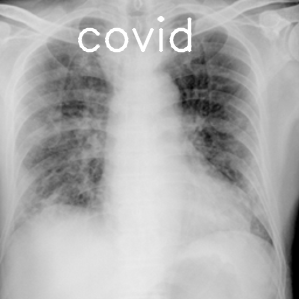

-------------------------------------





File name: COVID-2.png


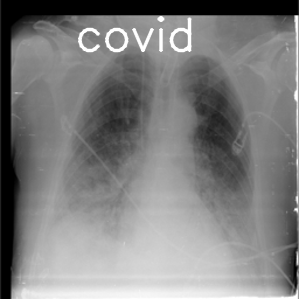

-------------------------------------





File name: COVID-3.png


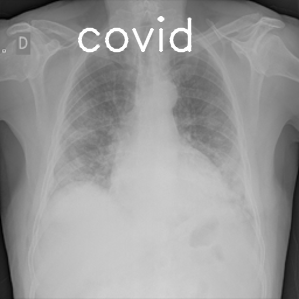

-------------------------------------





File name: COVID-4.png


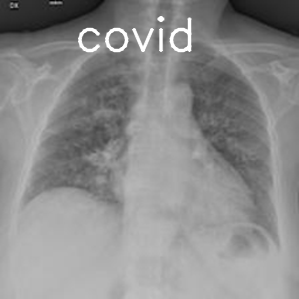

-------------------------------------





File name: COVID-5.png


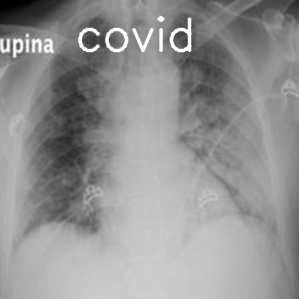

-------------------------------------





File name: NORMAL-1.png


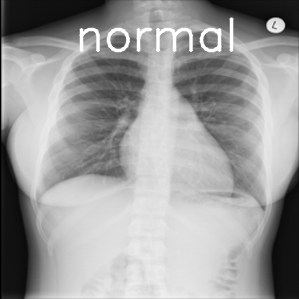

-------------------------------------





File name: NORMAL-2.png


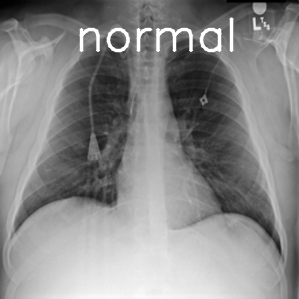

-------------------------------------





File name: NORMAL-3.png


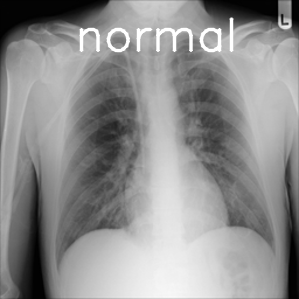

-------------------------------------





File name: NORMAL-4.png


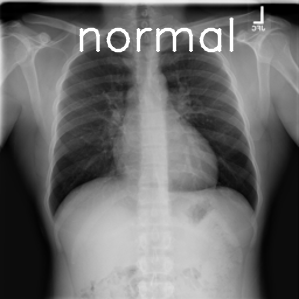

-------------------------------------





File name: NORMAL-5.png


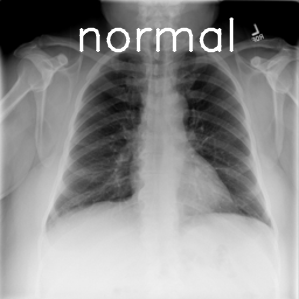

-------------------------------------





File name: OTHER-1.png


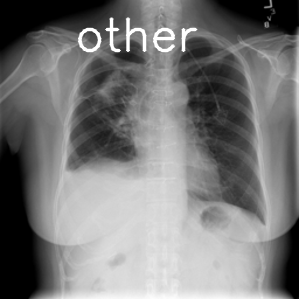

-------------------------------------





File name: OTHER-2.png


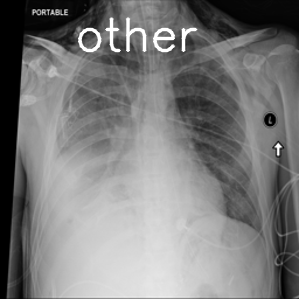

-------------------------------------





File name: OTHER-3.png


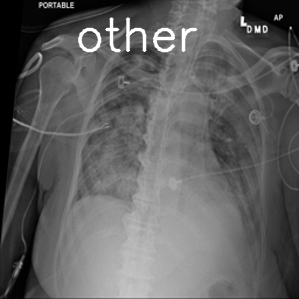

-------------------------------------





File name: OTHER-4.png


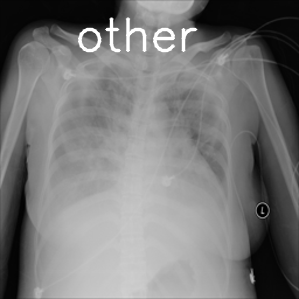

-------------------------------------





File name: OTHER-5.png


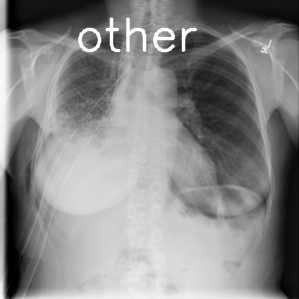

-------------------------------------







In [ ]:
sorted_dir = sorted(os.listdir('/content/drive/MyDrive/dataset/temp'))
src = '/content/drive/MyDrive/dataset/temp' + '/'
for file in sorted_dir:
  print('File name: ' + str(file))
  predict_img(src + file)
  print('-------------------------------------')
  print('\n\n\n\n')